In [1]:
import re
import numpy as np
import pandas as pd

In [2]:
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [3]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Remove deprecationWarning that I can't fix
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from pprint import pprint

In [5]:
# NLTK for removing stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['ordinance','davao','city','government','series','barangay','mayor','thereof','known','otherwise','pesos','sign','article','behalf','enter'])

In [6]:
# Import CSV Ordinance Dataset
df = pd.read_csv('ordinances/davao_ordinances.csv', header = 0)
print(df)
df.head()

            OR                                                 OT
0    000172-14  An Ordinance amending Section 42 of the 2005 R...
1    000177-14  An Ordinance placing underground all electrica...
2    000178-14  An Ordinance amending City Ordinance No. 0195-...
3    000173-14  An Ordinance regulating the use of some street...
4    000227-14  An ordinance for the creation of Trust Fund Ac...
..         ...                                                ...
414  000496-13  An Ordinance authorizing the City Mayor to ent...
415  000487-16  An Ordinance amending Section 13 Article XI of...
416  000348-07  Ordinance  Establishing the Gender-Sensitive C...
417  000349-07  ORDINANCE AMENDING DAVAO CITY ORDINANCE NO. 15...
418  000355-07  An  Ordinance  for  the  "Davao  Branding  Sys...

[419 rows x 2 columns]


,OR,OT
0,000172-14,An Ordinance amending Section 42 of the 2005 R...
1,000177-14,An Ordinance placing underground all electrica...
2,000178-14,An Ordinance amending City Ordinance No. 0195-...
3,000173-14,An Ordinance regulating the use of some street...
4,000227-14,An ordinance for the creation of Trust Fund Ac...


In [7]:
# List all ordinance titles
# Convert to list
data = list(df.OT) 
print(data[:1])

['An Ordinance amending Section 42 of the 2005 Revenue Code of Davao City from "Time and Place of the Payment - The tax shall be due and payable in advance to the City Treasurer or his duly authorized representative before the materials are extracted and shall be based on the volume applied for in the application for quarry concession" to "Tax shall be due and payable every quarter of the Calendar Year to the City Treasurer or his duly authorized representative after the materials are extracted based on the volume applied for in the application for quarry concession"']


In [8]:
# Remove qoutes
data = [re.sub("\'", "", sent) for sent in data]
data = [re.sub("\"", "", sent) for sent in data]

# Remove words ending with ING like amending, regulating
# Implemtation to be improved / Seems to improve topics
data = [re.sub('\S*ING\S*\s?', '', sent) for sent in data]
data = [re.sub('\S*ing\S*\s?', '', sent) for sent in data]



pprint(data[:5])

['An Ordinance Section 42 of the 2005 Revenue Code of Davao City from Time and '
 'Place of the Payment - The tax shall be due and payable in advance to the '
 'City Treasurer or his duly authorized representative before the materials '
 'are extracted and shall be based on the volume applied for in the '
 'application for quarry concession to Tax shall be due and payable every '
 'quarter of the Calendar Year to the City Treasurer or his duly authorized '
 'representative after the materials are extracted based on the volume applied '
 'for in the application for quarry concession',
 'An Ordinance underground all electrical and telecommunication wires and '
 'cables within the vicinity of City Hall and the Sangguniang Panlungsod of '
 'the City of Davao',
 'An Ordinance City Ordinance No. 0195-14, Series of 2004, otherwise known as '
 'the Amended scheme of Davao City for a 90-day experimental period',
 'An Ordinance the use of some streets near the Mintal Public Market in '
 'Baranga

In [9]:
#preprocess using gensim simple_preprocess and tokenize into words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

pprint(data_words[:1])

[['an',
  'ordinance',
  'section',
  'of',
  'the',
  'revenue',
  'code',
  'of',
  'davao',
  'city',
  'from',
  'time',
  'and',
  'place',
  'of',
  'the',
  'payment',
  'the',
  'tax',
  'shall',
  'be',
  'due',
  'and',
  'payable',
  'in',
  'advance',
  'to',
  'the',
  'city',
  'treasurer',
  'or',
  'his',
  'duly',
  'authorized',
  'representative',
  'before',
  'the',
  'materials',
  'are',
  'extracted',
  'and',
  'shall',
  'be',
  'based',
  'on',
  'the',
  'volume',
  'applied',
  'for',
  'in',
  'the',
  'application',
  'for',
  'quarry',
  'concession',
  'to',
  'tax',
  'shall',
  'be',
  'due',
  'and',
  'payable',
  'every',
  'quarter',
  'of',
  'the',
  'calendar',
  'year',
  'to',
  'the',
  'city',
  'treasurer',
  'or',
  'his',
  'duly',
  'authorized',
  'representative',
  'after',
  'the',
  'materials',
  'are',
  'extracted',
  'based',
  'on',
  'the',
  'volume',
  'applied',
  'for',
  'in',
  'the',
  'application',
  'for',
  'quarry

In [10]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [11]:

# See trigram example
pprint(trigram_mod[bigram_mod[data_words[0]]])

['an',
 'ordinance',
 'section',
 'of',
 'the',
 'revenue',
 'code',
 'of',
 'davao',
 'city',
 'from',
 'time',
 'and',
 'place',
 'of',
 'the',
 'payment',
 'the',
 'tax',
 'shall',
 'be',
 'due',
 'and',
 'payable',
 'in',
 'advance',
 'to',
 'the',
 'city',
 'treasurer',
 'or',
 'his',
 'duly',
 'authorized',
 'representative',
 'before',
 'the',
 'materials',
 'are',
 'extracted',
 'and',
 'shall',
 'be',
 'based',
 'on',
 'the',
 'volume',
 'applied',
 'for',
 'in',
 'the',
 'application',
 'for',
 'quarry',
 'concession',
 'to',
 'tax',
 'shall',
 'be',
 'due',
 'and',
 'payable',
 'every',
 'quarter',
 'of',
 'the',
 'calendar_year',
 'to',
 'the',
 'city',
 'treasurer',
 'or',
 'his',
 'duly',
 'authorized',
 'representative',
 'after',
 'the',
 'materials',
 'are',
 'extracted',
 'based',
 'on',
 'the',
 'volume',
 'applied',
 'for',
 'in',
 'the',
 'application',
 'for',
 'quarry',
 'concession']


In [12]:

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


In [13]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)


In [14]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_nostops)

# Create Corpus
texts = data_words_nostops

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 1), (6, 1), (7, 2), (8, 2), (9, 2), (10, 1), (11, 2), (12, 2), (13, 2), (14, 1), (15, 1), (16, 2), (17, 1), (18, 2), (19, 1), (20, 1), (21, 3), (22, 2), (23, 1), (24, 2), (25, 2), (26, 1)]]


In [15]:
id2word[0]

'advance'

In [16]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('advance', 1),
  ('application', 2),
  ('applied', 2),
  ('authorized', 2),
  ('based', 2),
  ('calendar', 1),
  ('code', 1),
  ('concession', 2),
  ('due', 2),
  ('duly', 2),
  ('every', 1),
  ('extracted', 2),
  ('materials', 2),
  ('payable', 2),
  ('payment', 1),
  ('place', 1),
  ('quarry', 2),
  ('quarter', 1),
  ('representative', 2),
  ('revenue', 1),
  ('section', 1),
  ('shall', 3),
  ('tax', 2),
  ('time', 1),
  ('treasurer', 2),
  ('volume', 2),
  ('year', 1)]]

In [17]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=123,
                                           update_every=1,
                                           chunksize=100,
                                           passes=30,
                                           alpha='auto',
                                           per_word_topics=True)

In [18]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.032*"public" + 0.026*"use" + 0.025*"commercial" + 0.022*"administration" + 0.022*"penalties" + 0.020*"within" + 0.016*"market" + 0.016*"violation" + 0.013*"fee" + 0.012*"certain"'), (1, '0.038*"construction" + 0.035*"amended" + 0.030*"operation" + 0.020*"development" + 0.018*"establishment" + 0.016*"site" + 0.016*"purposes" + 0.016*"private" + 0.016*"rules" + 0.016*"resettlement"'), (2, '0.046*"health" + 0.040*"among" + 0.018*"home" + 0.017*"seventy" + 0.017*"group" + 0.017*"part" + 0.017*"first" + 0.016*"namely" + 0.015*"local" + 0.014*"center"'), (3, '0.031*"two" + 0.026*"scheme" + 0.024*"ordinances" + 0.021*"enforcement" + 0.020*"council" + 0.020*"repeal" + 0.020*"therewith" + 0.019*"regulations" + 0.016*"unit" + 0.016*"conflict"'), (4, '0.049*"hundred" + 0.027*"five" + 0.025*"plan" + 0.025*"amount" + 0.024*"million" + 0.024*"fund" + 0.022*"funds" + 0.022*"management" + 0.021*"thousand" + 0.018*"therefor"'), (5, '0.026*"local" + 0.025*"classrooms" + 0.020*"covered" + 0.019*"

In [19]:
# Compute Perplexity
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.42701316544363443


In [20]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/Users/coriv/Developer/Ordinances_LDA/Ordinances_LDA/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.187477  0.251314       1        1  18.095031
8      0.183204 -0.213897       2        1  16.274727
1     -0.028199 -0.089243       3        1  14.363217
0     -0.131453  0.057322       4        1  10.700669
3     -0.084775 -0.003804       5        1   8.965744
4     -0.107413 -0.036978       6        1   8.590351
5      0.105988 -0.028334       7        1   7.893802
9     -0.068246  0.044252       8        1   6.546010
2      0.018780  0.002956       9        1   5.437343
7     -0.075363  0.016412      10        1   3.133109, topic_info=              Term       Freq      Total Category  logprob  loglift
224   construction  33.000000  33.000000  Default  30.0000  30.0000
260        hundred  25.000000  25.000000  Default  29.0000  29.0000
36         amended  30.000000  30.000000  Default  28.0000  28.0000
108           area  31.000000  31.000000  Default  27.0000  27.0000
292  comprehensive  14.000000  14.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
48             use   4.948943  23.813472  Topic10  -3.6158   1.8921
10           every   1.197009   3.506235  Topic10  -5.0352   2.3884
967       conflict   2.171371  10.977495  Topic10  -4.4396   1.8427
161       purposes   3.898397  39.550041  Topic10  -3.8544   1.1461
73     development   0.878724  31.246009  Topic10  -5.3443  -0.1080

[414 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1945      2  0.892008     accepptance
676       7  0.905658      accordance
1183      2  0.903010        accounts
144       7  0.847872             act
427       4  0.961643  administration
...     ...       ...             ...
35        4  0.622875          within
84       10  0.835878           women
864       5  0.895934         workers
137       2  0.914158              xi
26        2  0.954954            year

[431 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 2, 1, 4, 5, 6, 10, 3, 8])

In [21]:
# # Build Mallet LDA Model
# mallet_path = '/Users/root1/Development/lda/mallet/bin/mallet'
# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=12, id2word=id2word)

In [22]:
# # Show Topics
# # Only few topics make sense for me
# pprint(ldamallet.show_topics(formatted=False))

# # Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, corpus=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

In [23]:

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=123,
                                           update_every=1,
                                           chunksize=100,
                                           passes=30,
                                           alpha='auto',
                                           per_word_topics=True)
#         model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(lda_model)
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [24]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=60, step=6)

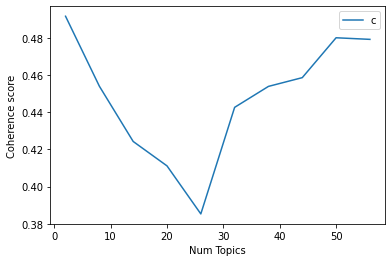

In [25]:
# Show graph to find optimal number of topics
# Coherence value not going flat seems unlikely or probably wrong
limit=60; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [26]:
# Print the coherence scores with increasing number of topics

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    

Num Topics = 2  has Coherence Value of 0.4916
Num Topics = 8  has Coherence Value of 0.454
Num Topics = 14  has Coherence Value of 0.4242
Num Topics = 20  has Coherence Value of 0.4111
Num Topics = 26  has Coherence Value of 0.3853
Num Topics = 32  has Coherence Value of 0.4426
Num Topics = 38  has Coherence Value of 0.4539
Num Topics = 44  has Coherence Value of 0.4586
Num Topics = 50  has Coherence Value of 0.48
Num Topics = 56  has Coherence Value of 0.4792


In [38]:
# Select the model and print the topics
optimal_model = model_list[1] # when number of topics is 8
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.039*"public" + 0.021*"administration" + 0.020*"buhangin" + 0.017*"street" '
  '+ 0.017*"beach" + 0.017*"respective" + 0.016*"market" + 0.015*"penalties" + '
  '0.015*"violation" + 0.013*"within"'),
 (1,
  '0.026*"business" + 0.026*"construction" + 0.022*"establishments" + '
  '0.020*"operation" + 0.014*"sale" + 0.014*"among" + 0.012*"area" + '
  '0.011*"project" + 0.011*"site" + 0.011*"rules"'),
 (2,
  '0.019*"percent" + 0.017*"seventy" + 0.016*"regulatory" + 0.015*"made" + '
  '0.015*"portion" + 0.013*"quality" + 0.013*"marketability" + 0.013*"raise" + '
  '0.010*"tourism" + 0.009*"tax"'),
 (3,
  '0.030*"entered" + 0.026*"agreement" + 0.025*"memorandum" + 0.022*"new" + '
  '0.022*"program" + 0.020*"department" + 0.019*"area" + 0.019*"relative" + '
  '0.019*"two" + 0.016*"development"'),
 (4,
  '0.047*"hundred" + 0.026*"five" + 0.025*"scheme" + 0.024*"amount" + '
  '0.024*"fund" + 0.023*"million" + 0.020*"thousand" + 0.020*"relocation" + '
  '0.017*"risk" + 0.017*"management"

AttributeError: 'LdaModel' object has no attribute 'topic_keywords'

In [28]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)




,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.8156,"section, code, revenue, amended, particularly,...",An Ordinance Section 42 of the 2005 Revenue Co...
1,1,0.0,0.8940,"public, administration, buhangin, street, beac...",An Ordinance underground all electrical and te...
2,2,5.0,0.6743,"section, code, revenue, amended, particularly,...","An Ordinance City Ordinance No. 0195-14, Serie..."
3,3,3.0,0.5033,"entered, agreement, memorandum, new, program, ...",An Ordinance the use of some streets near the ...
4,4,7.0,0.8490,"comprehensive, health, use, code, welfare, con...",An ordinance for the creation of Trust Fund Ac...
5,5,5.0,0.3697,"section, code, revenue, amended, particularly,...",An ordinance the Tourism Code of Davao City
6,6,6.0,0.8895,"matina, phase, implementation, land, commercia...",An Ordinance Legislative Authority to City May...
7,7,6.0,0.7965,"matina, phase, implementation, land, commercia...",An ordinance legislative authority to City May...
8,8,0.0,0.6005,"public, administration, buhangin, street, beac...",An Ordinance motorcades within the territorial...
9,9,6.0,0.8808,"matina, phase, implementation, land, commercia...","An ordinance the City Mayor, Rodrigo R. Dutert..."


In [39]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 1000

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9511,"public, administration, buhangin, street, beach, respective, market, penalties, violation, within","An Ordinance for the one-way vehicular traffic of Toril Public Market Main Road, Road 1, Road 2, Road 3, and Lao Street (corner Main Road to Agton Street), Toril Poblacion, this City"
1,1.0,0.9638,"business, construction, establishments, operation, sale, among, area, project, site, rules","An ordinance businesses and establishments in Davao City which offer Halal products and services to acquire hlal certification from the National Commission for Muslim Filipinos (NCMF) accredited bodies, prior to the of the word Halal within their premisees or to use the Halal logo in their business name"
2,2.0,0.9523,"percent, seventy, regulatory, made, portion, quality, marketability, raise, tourism, tax","An Ordinance and the tax on the seventy percent (70%) of the local business tax paid by Black & Veatch (BVIP), Contractor/Service Provider of Therma South Inc. (TSI), between Davao City and the Municipality of Sta. Cruz, Davao del Sur, which is 66.6%-33.3% in favor of Davao City"
3,3.0,0.9244,"entered, agreement, memorandum, new, program, department, area, relative, two, development","An Ordinance Aledia Elementary School to Alfredo A. Aledia Elementary School, located at Sitio Bucana, Barangay Lasang, Bunawan District, this City"
4,4.0,0.9647,"hundred, five, scheme, amount, fund, million, thousand, relocation, risk, management","An ordinance the Davao City Disaster Risk Reduction and Management Fund Investment Plan (DCRRMFIP) for CY 2015, as prepared and approved by the Davao City Disaster Risk Reduction and Management Council in the amount of Five Hundred Forty-Four Million Nine Hundred Thirty-Five Thousand Three Hundred Forty-Three Pesos and 69/100 (P544,935,343.69)"
5,5.0,0.9515,"section, code, revenue, amended, particularly, covered, fees, system, accounts, xi",the fees prescribed under Republic Act No. 9048 on and service fees for Petitions to correct clerical or typographical errors and change of first names or nicknames in Birth Certificates and all other Civil Registry documents
6,6.0,0.9664,"matina, phase, implementation, land, commercial, therefor, center, memorandum, funds, resettlement","An ordinance the Deed of Donation of several parcels of land executed by Kisan Lu Realty, Inc., represented by Arch. Kristin L. Lu, President and CEO, in favor of the City Government of Davao, road lots and open spaces of Villa Kareena Subdivision located in Barangay Baliok, Talomo District, this city, and the City Mayor to sign the same for and in behalf of the City Government of Davao"
7,7.0,0.9134,"comprehensive, health, use, code, welfare, conflict, purposes, plan, enforcement, therewith",An Ordinance for the manadatory supervised daily toothbrush drill for children under the Early Childhood Care and Development Programof Davao City


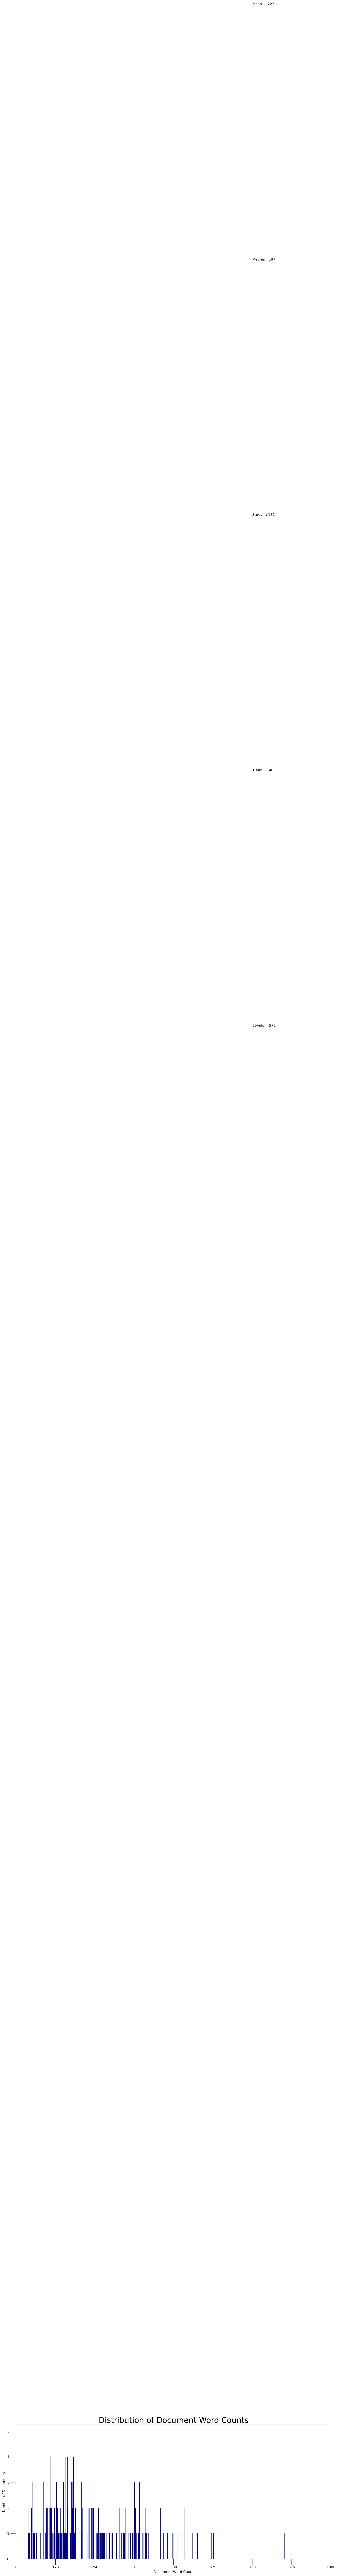

In [30]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

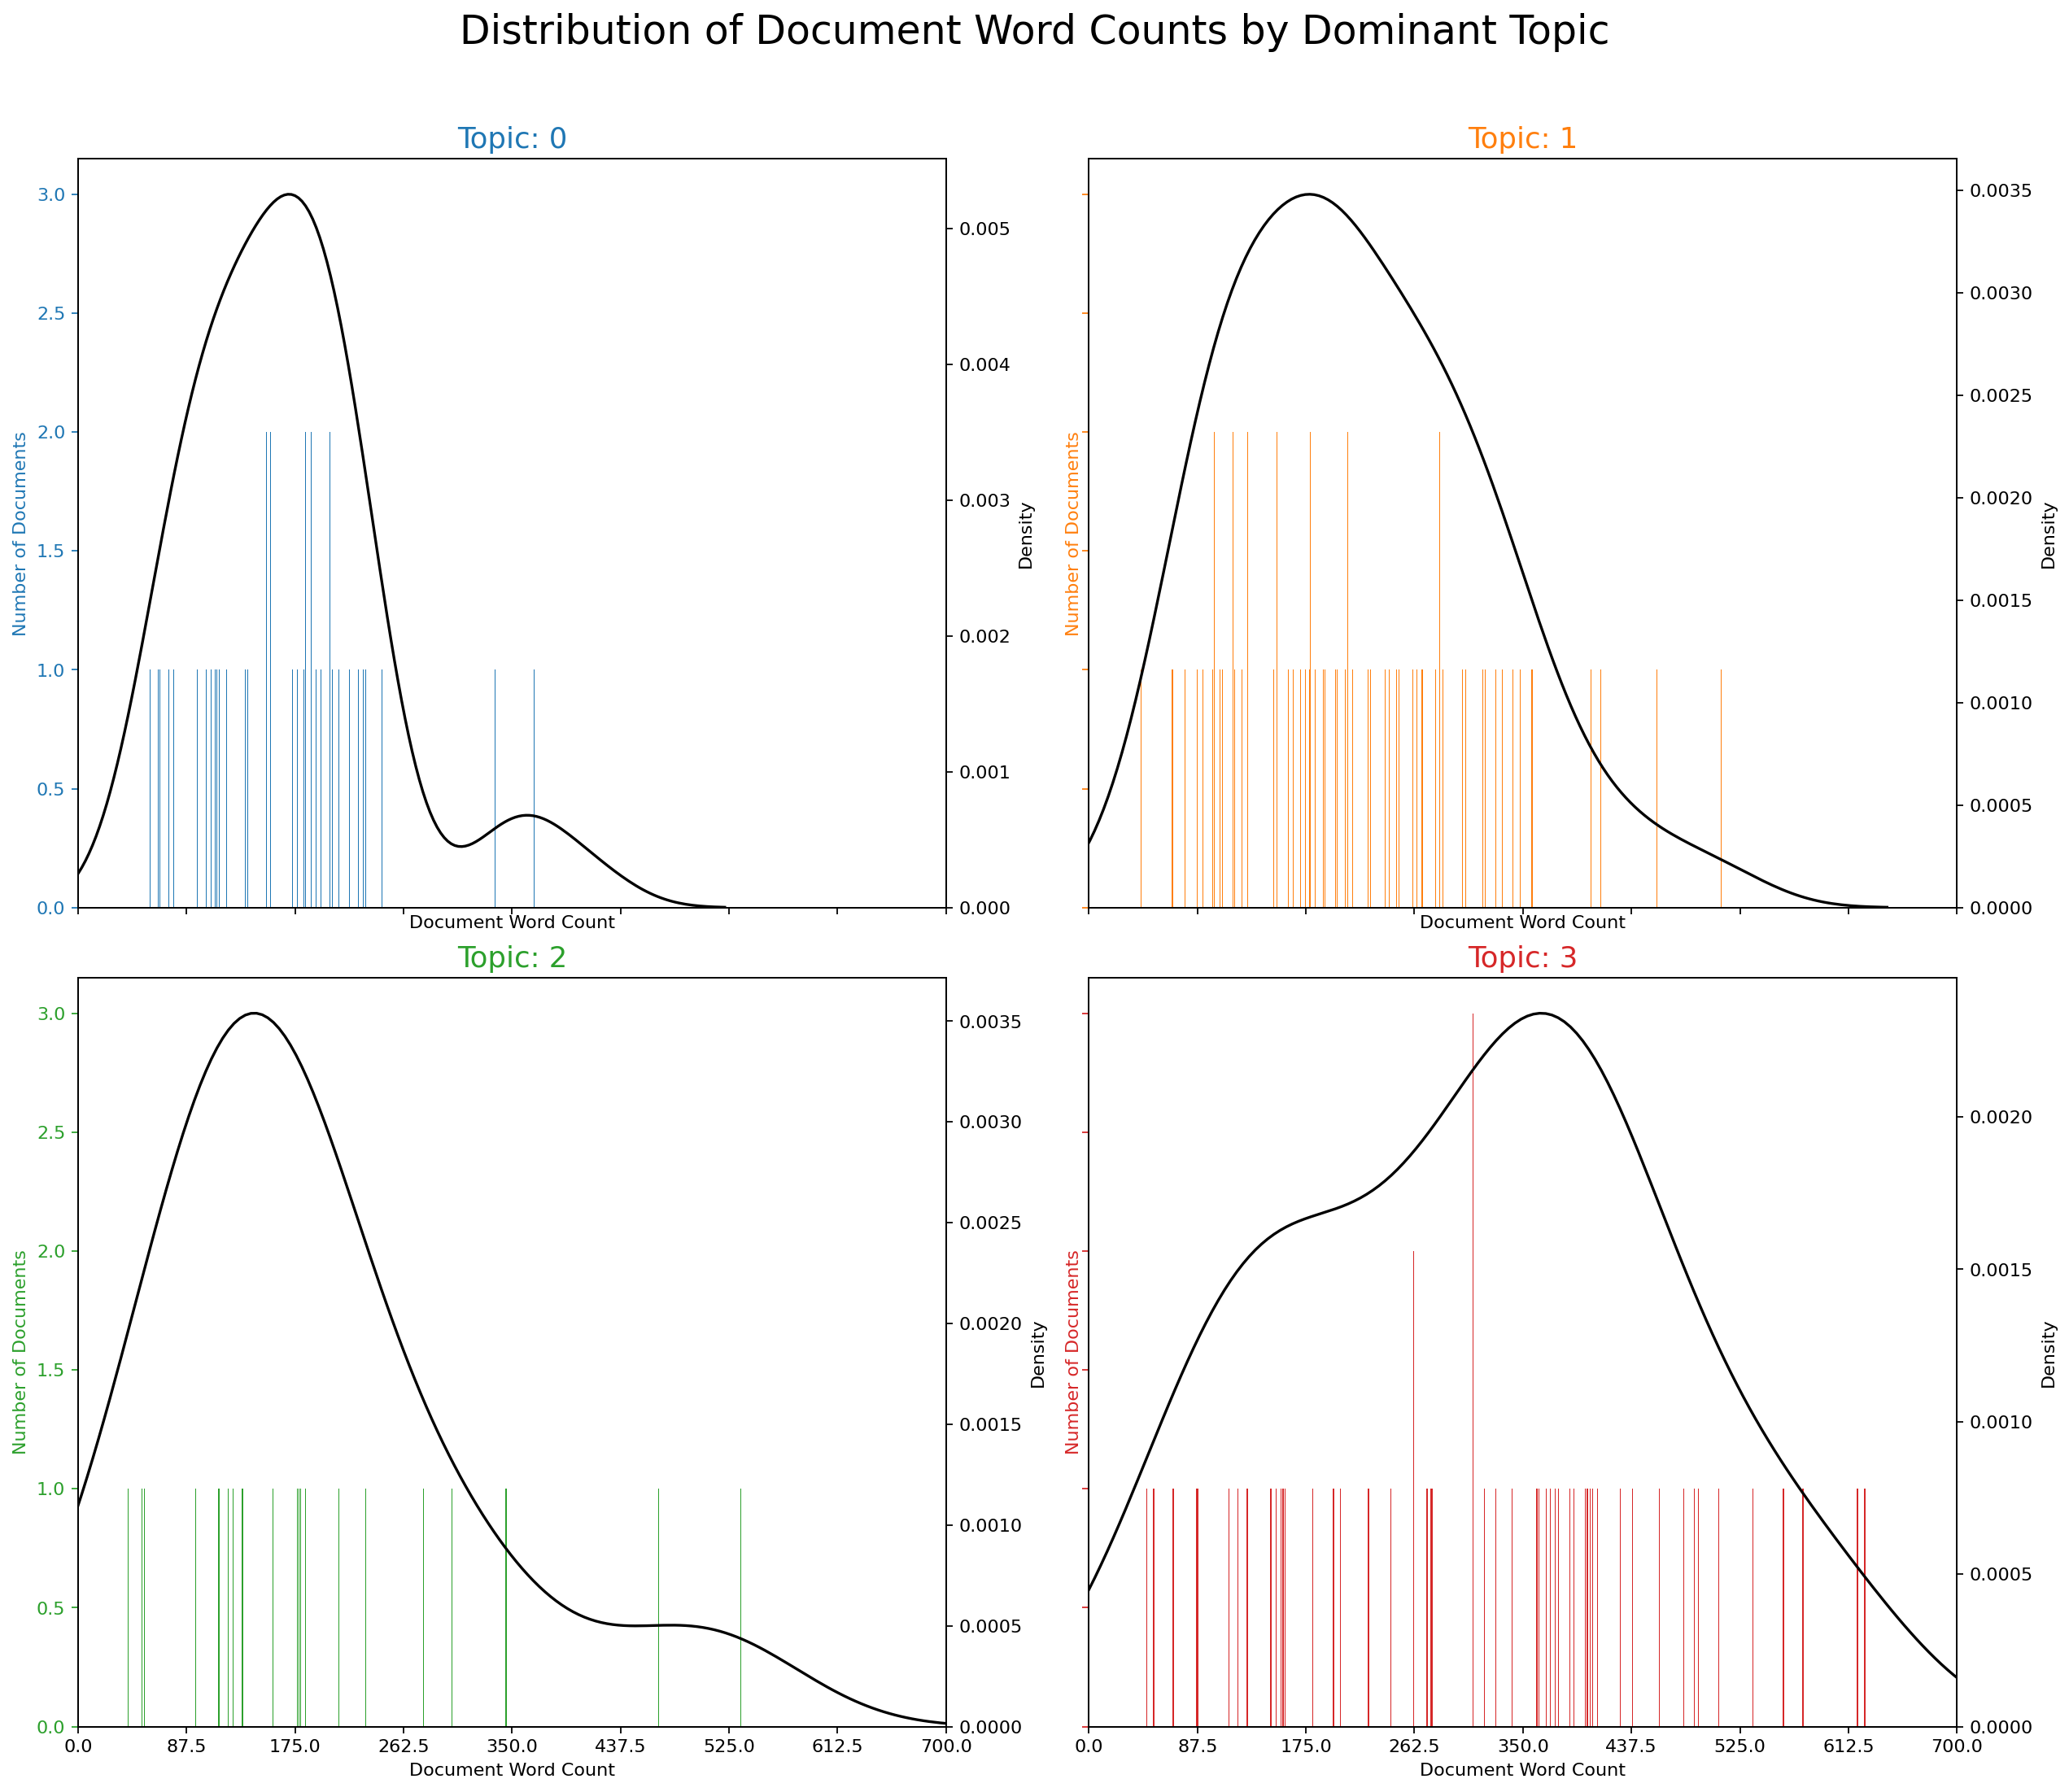

In [31]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 700, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 700), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,700,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

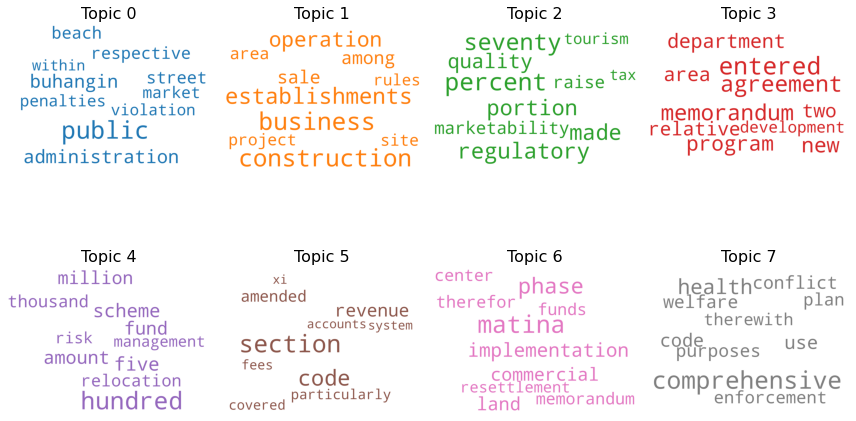

In [32]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 4, figsize=(12,8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Topic 0 - ?
Topic 1 - Market
Topic 2 - Health
Topic 3 - ?
Topic 4 - Fund Allocation
Topic 5 - Fund Allocation
Topic 6 - Agreements/Memos
Topic 7 - Establishments

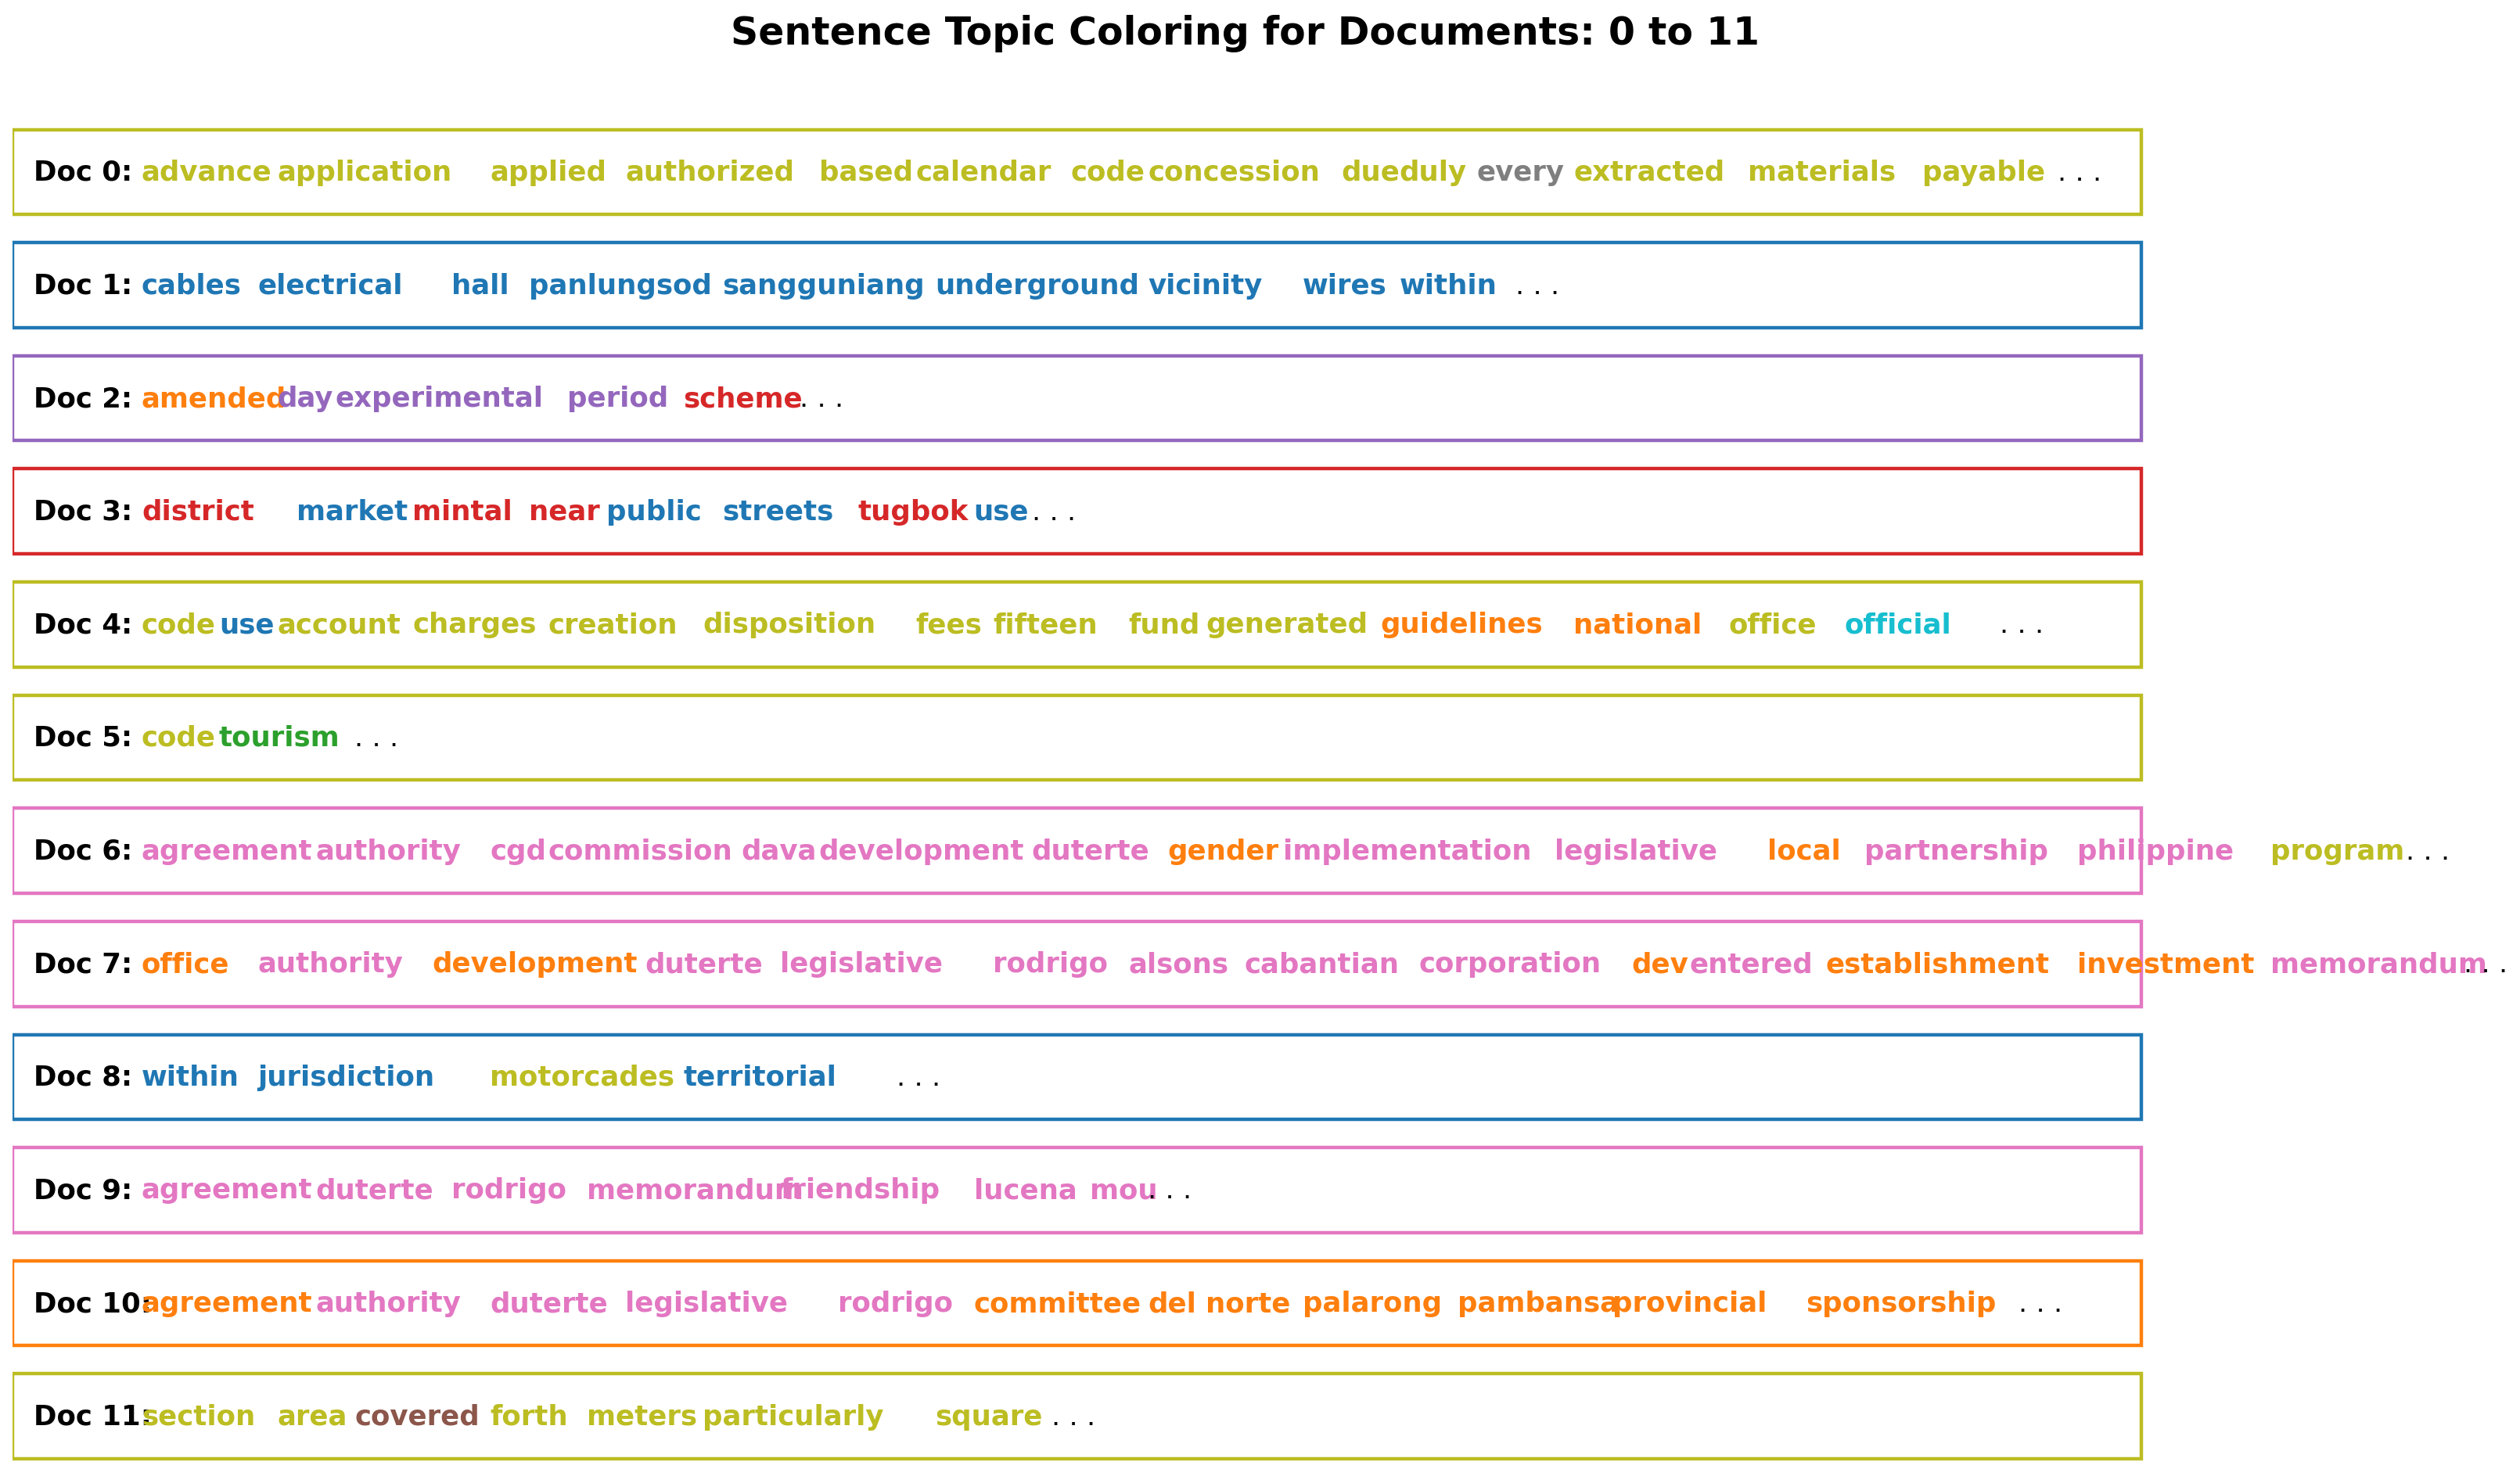

In [33]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

/var/folders/5w/v1hv7scs4gl14_30l_pjsrj00000gn/T/ipykernel_1943/4235454336.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


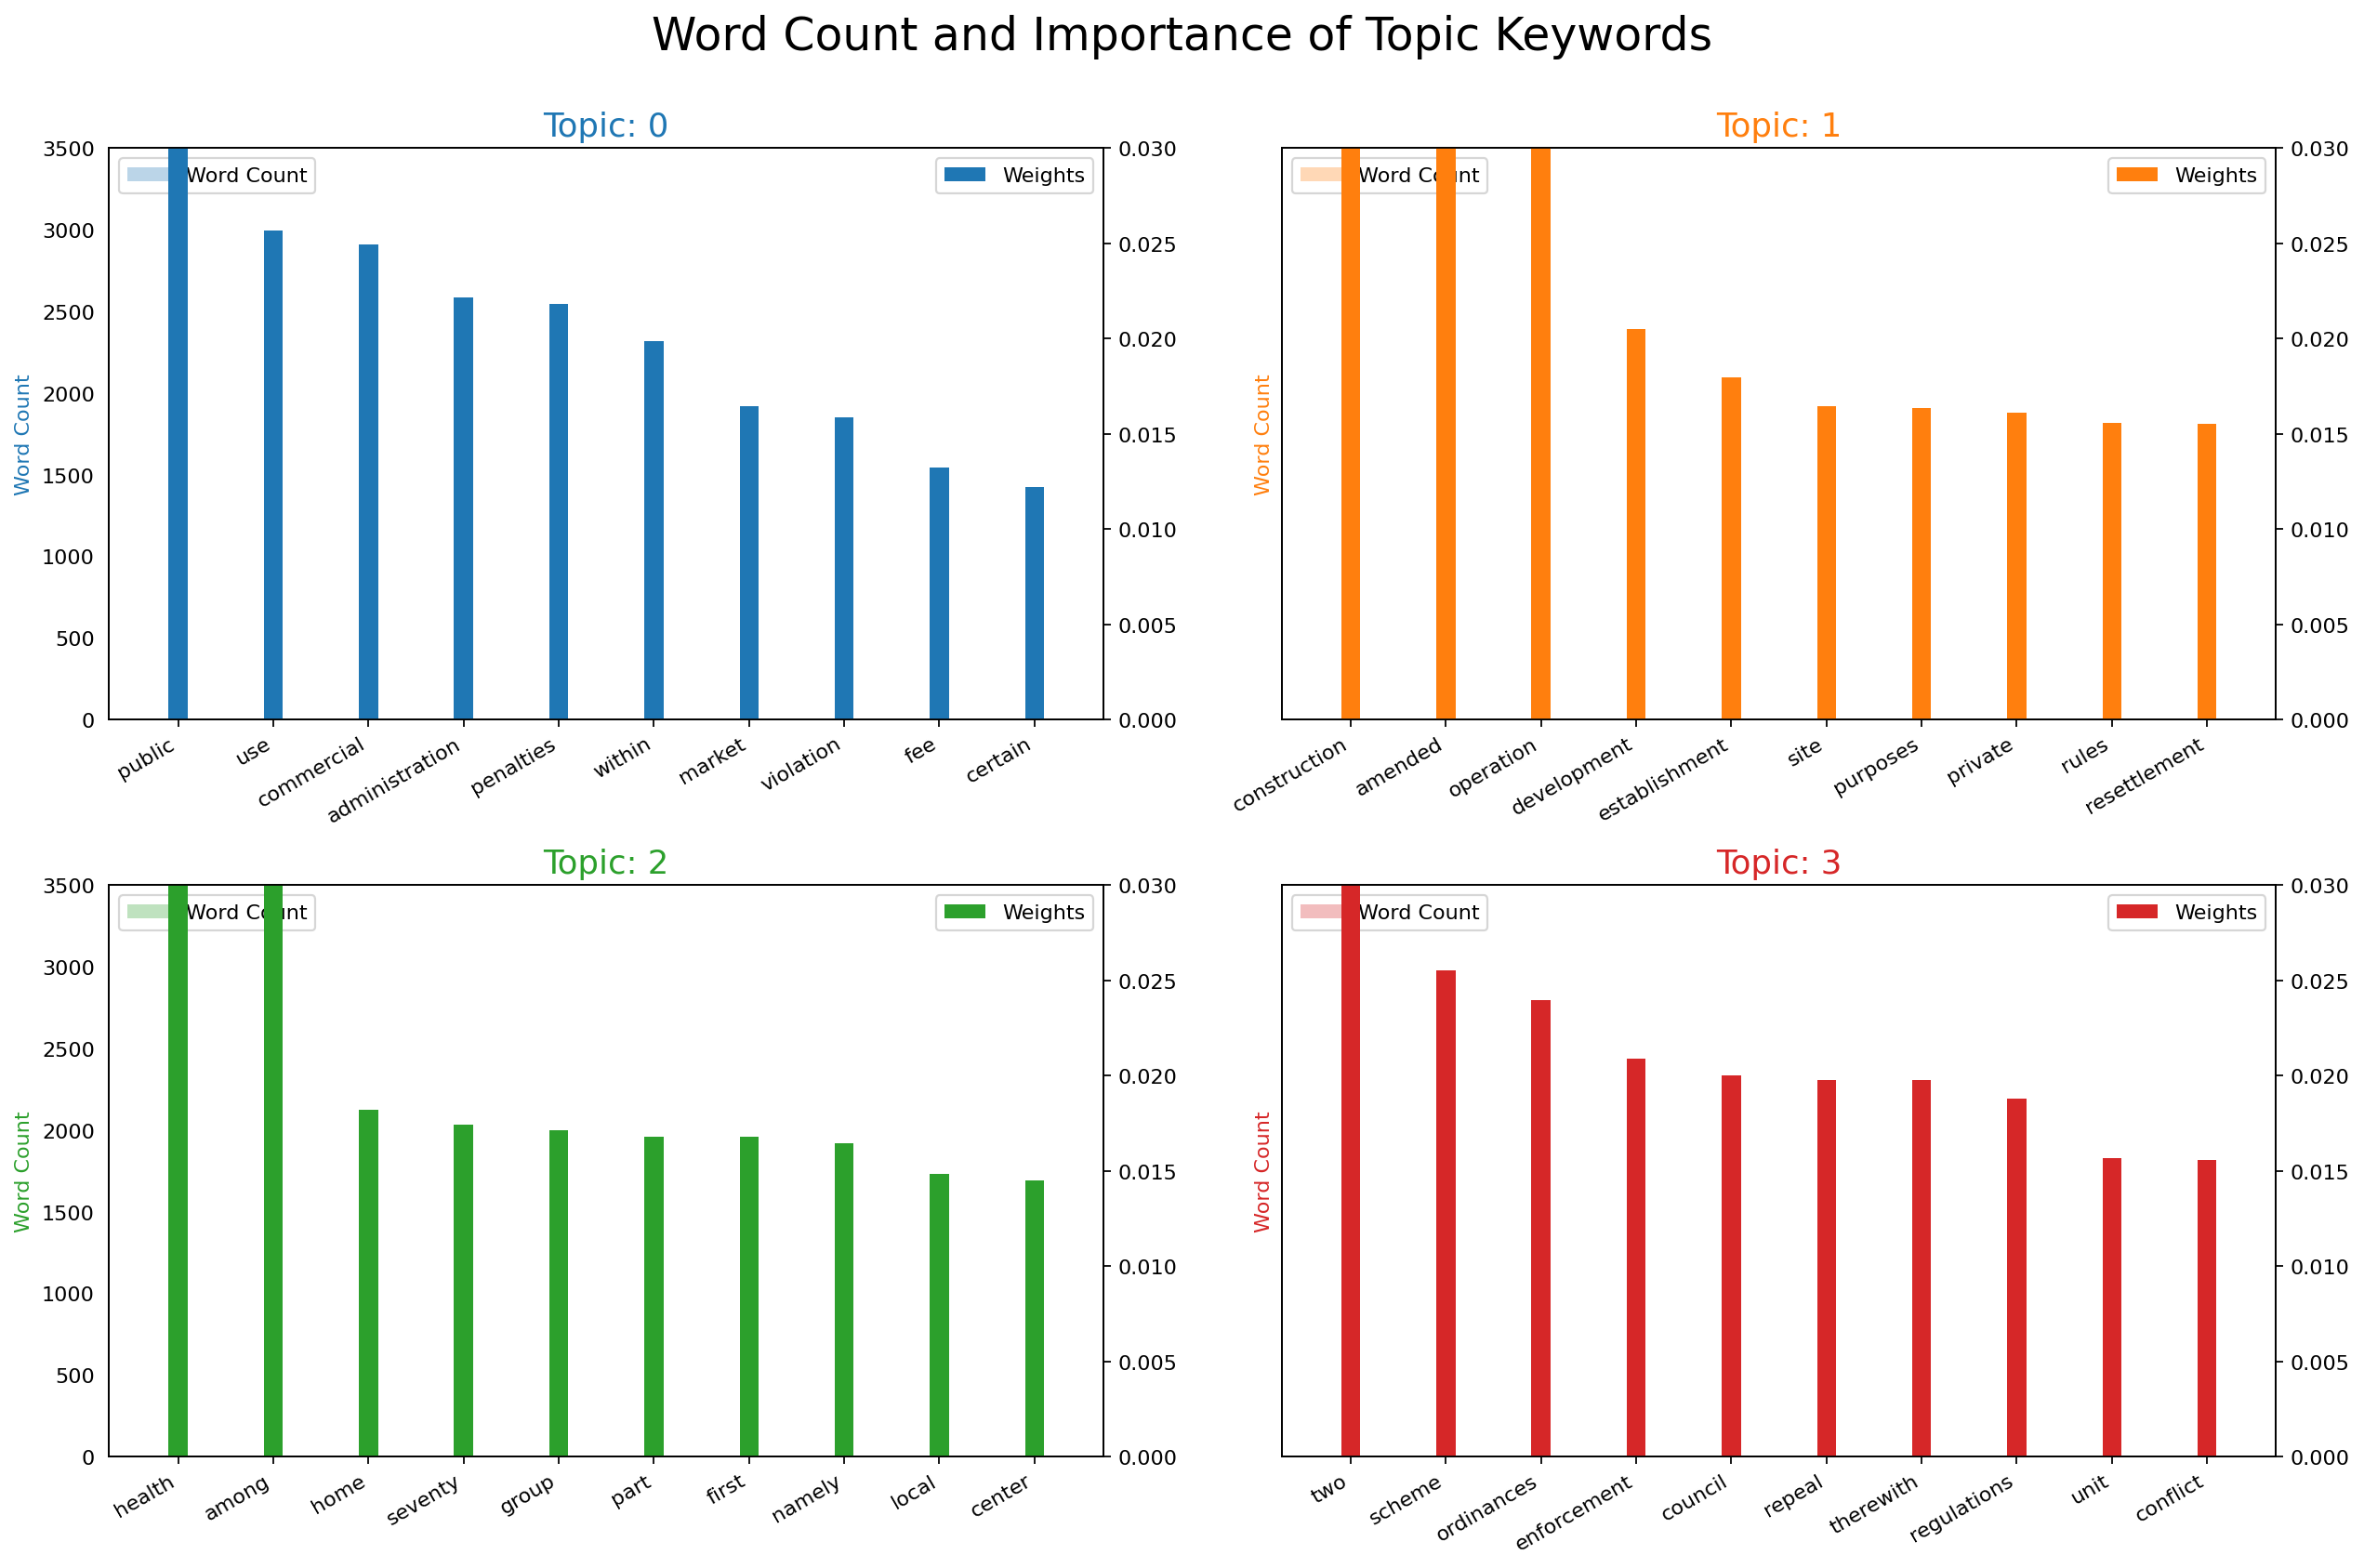

In [34]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [35]:
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)
from matplotlib.ticker import FuncFormatter


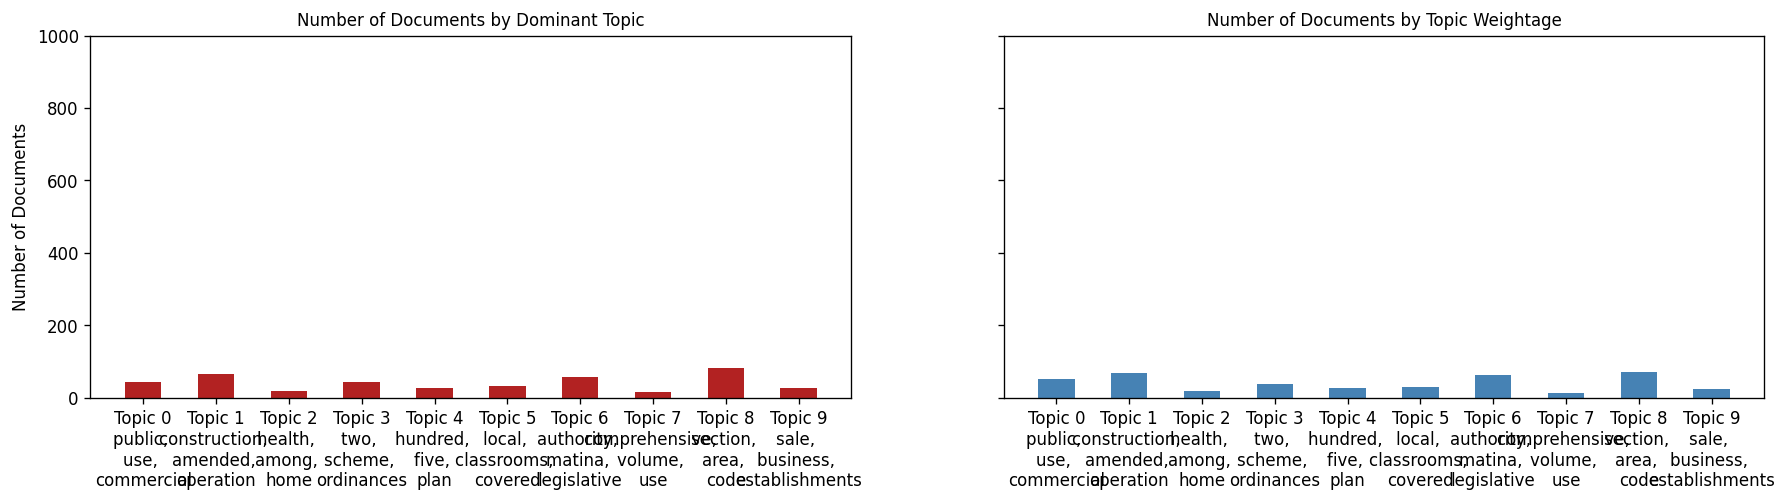

In [36]:

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [37]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/Users/coriv/Developer/Ordinances_LDA/Ordinances_LDA/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.187477  0.251314       1        1  18.094926
8      0.183204 -0.213897       2        1  16.274901
1     -0.028199 -0.089243       3        1  14.363092
0     -0.131453  0.057322       4        1  10.700755
3     -0.084775 -0.003804       5        1   8.965774
4     -0.107413 -0.036978       6        1   8.590349
5      0.105988 -0.028334       7        1   7.893825
9     -0.068246  0.044252       8        1   6.545938
2      0.018780  0.002956       9        1   5.437337
7     -0.075363  0.016412      10        1   3.133105, topic_info=              Term       Freq      Total Category  logprob  loglift
224   construction  33.000000  33.000000  Default  30.0000  30.0000
260        hundred  25.000000  25.000000  Default  29.0000  29.0000
36         amended  30.000000  30.000000  Default  28.0000  28.0000
108           area  31.000000  31.000000  Default  27.0000  27.0000
292  comprehensive  14.000000  14.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
48             use   4.948937  23.813571  Topic10  -3.6158   1.8921
10           every   1.197007   3.506231  Topic10  -5.0352   2.3884
967       conflict   2.171368  10.977519  Topic10  -4.4396   1.8427
161       purposes   3.898391  39.549882  Topic10  -3.8544   1.1461
73     development   0.878723  31.245803  Topic10  -5.3443  -0.1080

[414 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1945      2  0.892000     accepptance
676       7  0.905655      accordance
1183      2  0.903001        accounts
144       7  0.847869             act
427       4  0.961635  administration
...     ...       ...             ...
35        4  0.622873          within
84       10  0.835879           women
864       5  0.895932         workers
137       2  0.914149              xi
26        2  0.954944            year

[431 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 2, 1, 4, 5, 6, 10, 3, 8])

/Users/coriv/Developer/Ordinances_LDA/Ordinances_LDA/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/coriv/Developer/Ordinances_LDA/Ordinances_LDA/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/coriv/Developer/Ordinances_LDA/Ordinances_LDA/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/coriv/Developer/Ordinances_LDA/Ordinances_LDA/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative us